In [2]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_dir="../input/face-recognition-dataset/Original Images/Original Images/"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 2562 images belonging to 31 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [5]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                        

In [6]:
history = model.fit(train_ds,epochs= 30, batch_size=32)

Epoch 1/30


2023-12-27 16:06:40.356102: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


81/81 [==============================] - 74s 739ms/step - loss: 3.4248 - accuracy: 0.0909
Epoch 2/30
81/81 [==============================] - 37s 457ms/step - loss: 2.7412 - accuracy: 0.2213
Epoch 3/30
81/81 [==============================] - 38s 466ms/step - loss: 2.2388 - accuracy: 0.3392
Epoch 4/30
81/81 [==============================] - 38s 464ms/step - loss: 1.8847 - accuracy: 0.4387
Epoch 5/30
81/81 [==============================] - 38s 467ms/step - loss: 1.5435 - accuracy: 0.5320
Epoch 6/30
81/81 [==============================] - 38s 464ms/step - loss: 1.3582 - accuracy: 0.5859
Epoch 7/30
81/81 [==============================] - 39s 478ms/step - loss: 1.0209 - accuracy: 0.6979
Epoch 8/30
81/81 [==============================] - 41s 504ms/step - loss: 0.8766 - accuracy: 0.7424
Epoch 9/30
81/81 [==============================] - 37s 459ms/step - loss: 0.5967 - accuracy: 0.8290
Epoch 10/30
81/81 [==============================] - 39s 476ms/step - loss: 0.6232 - accuracy: 0.8154


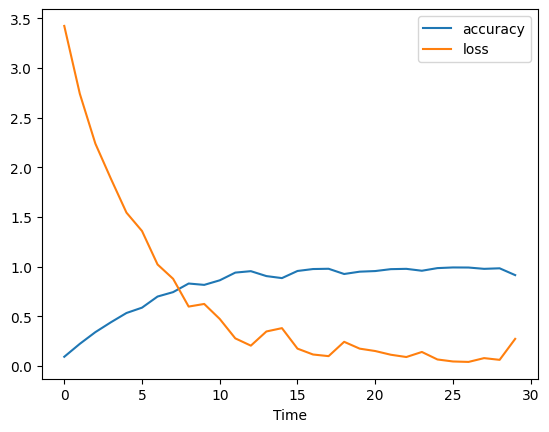

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [8]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

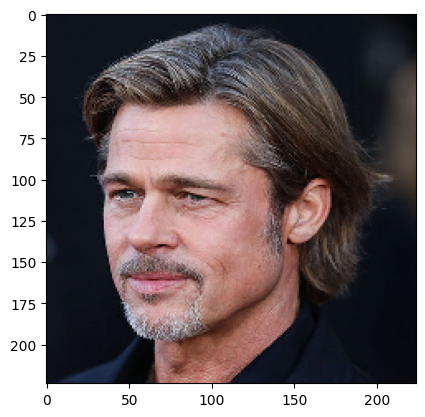

1/1 [==============================] - 0s 371ms/step
Actual: Brad Pitt
Predicted: Brad Pitt


In [9]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Brad Pitt/Brad Pitt_102.jpg")

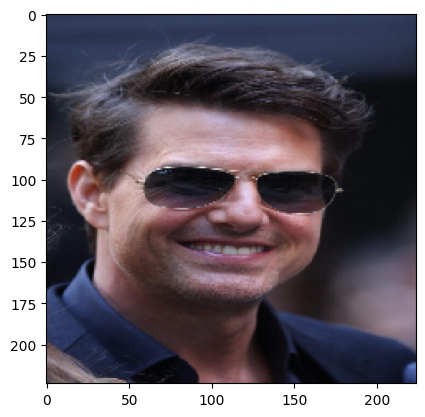

1/1 [==============================] - 0s 24ms/step
Actual: Tom Cruise
Predicted: Tom Cruise


In [10]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Tom Cruise/Tom Cruise_27.jpg")

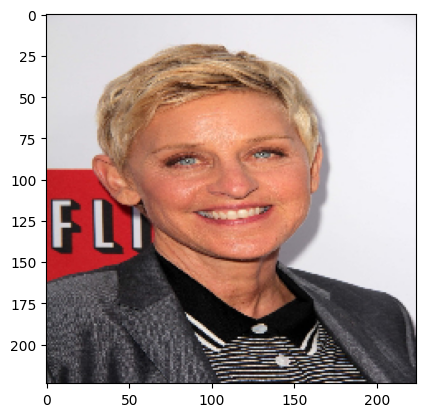

1/1 [==============================] - 0s 20ms/step
Actual: Ellen Degeneres
Predicted: Ellen Degeneres


In [11]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Ellen Degeneres/Ellen Degeneres_20.jpg")

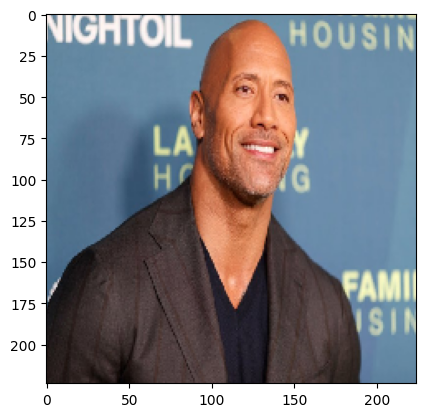

1/1 [==============================] - 0s 20ms/step
Actual: Dwayne Johnson
Predicted: Dwayne Johnson


In [12]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Dwayne Johnson/Dwayne Johnson_29.jpg")